In [86]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
image = cv2.imread("./Lake.png", cv2.IMREAD_COLOR)

In [4]:
image.shape

(494, 480, 3)

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

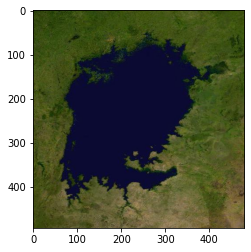

In [6]:
plt.imshow(image)

In [7]:
image_reshape = image.reshape(-1,3)

In [8]:
image_reshape.shape

(237120, 3)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans.fit(image_reshape)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [12]:
centroid = kmeans.cluster_centers_

In [13]:
centroid

array([[ 11.64215648,  12.99046251,  45.77613428],
       [ 64.60720106,  79.61618663,  22.95915979],
       [107.39504705, 103.53832592,  56.71169971]])

In [14]:
uint8_array = np.clip(centroid, 0, 255).astype(np.uint8)

In [15]:
uint8_array

array([[ 11,  12,  45],
       [ 64,  79,  22],
       [107, 103,  56]], dtype=uint8)

In [16]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [17]:
labels

array([1, 1, 1, ..., 2, 2, 2])

In [18]:
segmented_image = cluster_centers[labels]
segmented_image = segmented_image.reshape(image.shape)

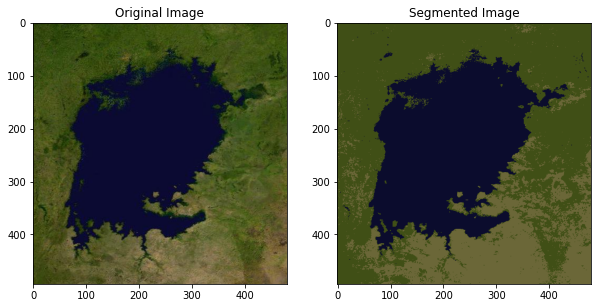

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [20]:
num_clusters = 3

In [21]:
points_in_clusters = [[] for _ in range(num_clusters)]

In [22]:
for i, label in enumerate(labels):
    points_in_clusters[label].append(image_reshape[i])

In [23]:
pixel_no = []

In [24]:
for i in range(len(points_in_clusters)):
    print(f"Cluster {i} = {len(points_in_clusters[i])} px")
    pixel_no.append(len(points_in_clusters[i]))

Cluster 0 = 77285 px
Cluster 1 = 111054 px
Cluster 2 = 48781 px


In [26]:
uint8_array[0]

array([11, 12, 45], dtype=uint8)

In [27]:
cluster_color = uint8_array
cluster_color_normalized= [(r / 255, g / 255, b / 255) for (r, g, b) in cluster_color]

Text(0.5, 1.0, 'Pie Chart')

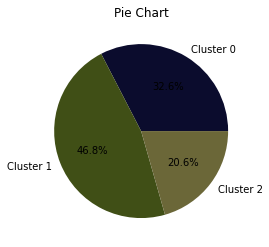

In [28]:
plt.pie(pixel_no, labels = [f"Cluster {i}" for i in range(num_clusters)],colors = cluster_color_normalized,autopct='%1.1f%%')
plt.title("Pie Chart")

In [29]:
cluster_R = uint8_array[:,0]
cluster_G = uint8_array[:,1]
cluster_B = uint8_array[:,2]
cluster_count = pixel_no

In [31]:
data = {"Cluster_R" : cluster_R,"Cluster_G" : cluster_G,"Cluster_B" : cluster_B, "Cluster_count" : pixel_no}

In [32]:
df = pd.DataFrame(data)

In [33]:
df


,Cluster_R,Cluster_G,Cluster_B,Cluster_count
0,11,12,45,77285
1,64,79,22,111054
2,107,103,56,48781


In [37]:
lake_pixel = df.iloc[0,3]

In [38]:
lake_pixel

77285

In [39]:
total_area = 200000

In [40]:
area_for_pixel = total_area/sum(pixel_no)

In [41]:
Area_lake = lake_pixel * area_for_pixel

In [42]:
print(f"The area of lake is {Area_lake}")

The area of lake is 65186.403508771924


In [43]:
image_reshape_test = image_reshape.astype("float32") / 255

In [44]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, max_iter=300)
    kmeans.fit(image_reshape)
    wcss.append(kmeans.inertia_)

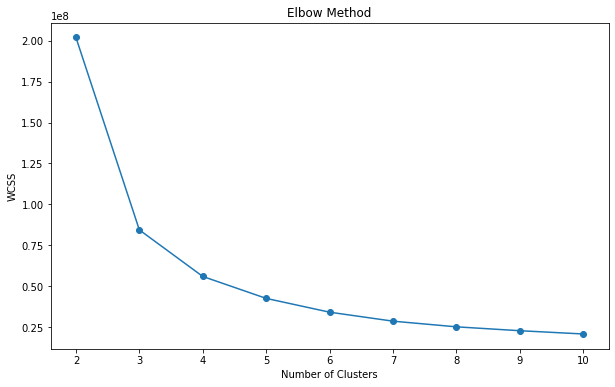

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.show()

In [47]:
kmeans1 = KMeans(n_clusters=4, random_state=42)

In [48]:
kmeans1.fit(image_reshape)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [49]:
num_clusters = 4

In [50]:
points_in_clusters = [[] for _ in range(num_clusters)]

In [51]:
cluster_centers = kmeans1.cluster_centers_
labels = kmeans1.labels_

In [52]:
for i, label in enumerate(labels):
    points_in_clusters[label].append(image_reshape[i])
    

In [53]:
pixel_no = []

In [54]:
labels

array([2, 2, 2, ..., 3, 3, 3])

In [56]:
pixel_new = []

for i in range(len(points_in_clusters)):
    print(f"Cluster {i} = {len(points_in_clusters[i])} px")
    pixel_new.append(len(points_in_clusters[i]))

Cluster 0 = 62566 px
Cluster 1 = 76119 px
Cluster 2 = 70087 px
Cluster 3 = 28348 px


In [62]:
centroid1 = kmeans1.cluster_centers_

In [63]:
uint8_array = np.clip(centroid1, 0, 255).astype(np.uint8)

In [69]:
uint8_array

array([[ 82,  90,  35],
       [ 11,  12,  46],
       [ 56,  74,  17],
       [117, 109,  65]], dtype=uint8)

In [70]:
cluster_R = uint8_array[:,0]
cluster_G = uint8_array[:,1]
cluster_B = uint8_array[:,2]
cluster_count = pixel_new

In [68]:
centroid1

array([[ 82.09024836,  90.23702028,  35.96370812],
       [ 11.41323736,  12.51491469,  46.236783  ],
       [ 56.78712288,  74.22578264,  17.62221907],
       [117.94008645, 109.54747732,  65.57320011]])

In [72]:
data_new = {"Cluster_R" : cluster_R,"Cluster_G" : cluster_G,"Cluster_B" : cluster_B, "Cluster_count" : pixel_new}

In [73]:
data_new

{'Cluster_R': array([ 82,  11,  56, 117], dtype=uint8),
 'Cluster_G': array([ 90,  12,  74, 109], dtype=uint8),
 'Cluster_B': array([35, 46, 17, 65], dtype=uint8),
 'Cluster_count': [62566, 76119, 70087, 28348]}

In [74]:
df_new = pd.DataFrame(data_new)

In [75]:
df_new

,Cluster_R,Cluster_G,Cluster_B,Cluster_count
0,82,90,35,62566
1,11,12,46,76119
2,56,74,17,70087
3,117,109,65,28348


In [80]:
lake_pixel = df.iloc[1,3]

In [81]:
Area_lake = lake_pixel * area_for_pixel

In [82]:
print(f"The area of lake is {Area_lake}")

The area of lake is 93669.02834008097


In [83]:
cluster_color = uint8_array
cluster_color_normalized= [(r / 255, g / 255, b / 255) for (r, g, b) in cluster_color]

Text(0.5, 1.0, 'Pie Chart')

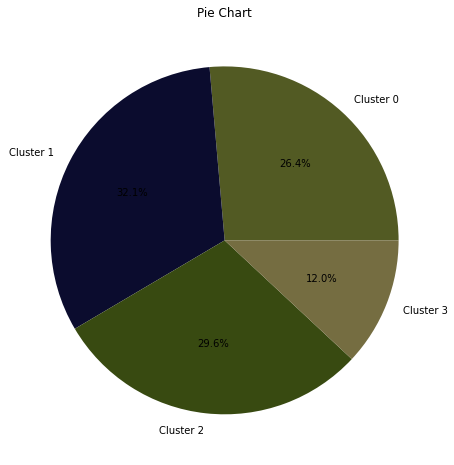

In [93]:
plt.figure(figsize=(8, 8))  
plt.pie(pixel_new, labels = [f"Cluster {i}" for i in range(4)],colors = cluster_color_normalized,autopct='%1.1f%%')
plt.title("Pie Chart")

In [97]:
cluster_labels = kmeans.fit_predict(image_reshape)

In [102]:
image_2d = image_reshape

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

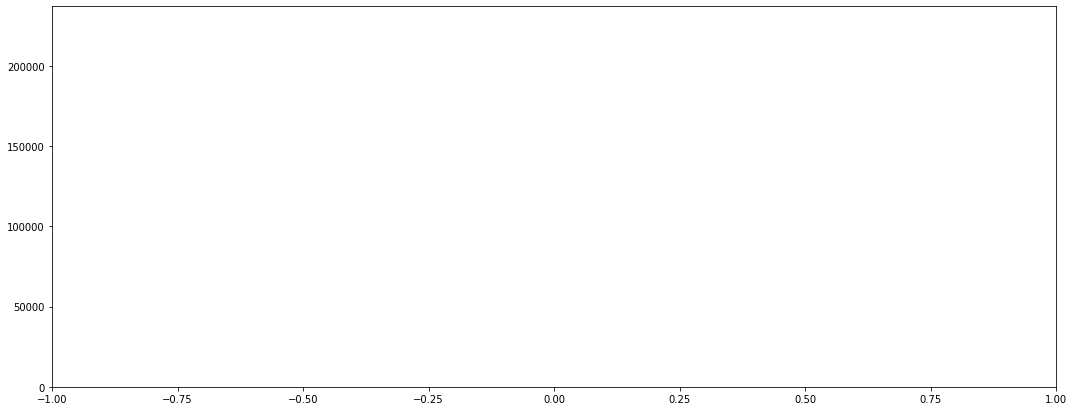

In [103]:
for n_clusters in range(1,5):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(image_2d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(image_2d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(image_2d, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(image_2d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
